In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd

from torch.autograd import Variable
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def generate_data(N, dim=32, attention_col=1):
    x = np.random.standard_normal(size=(N, dim))
    y = np.random.randint(low=0, high=3, size=(N, 1))
    x[:, attention_col] = y[:, 0]
    return x, y

In [3]:
class Net(nn.Module):
    def __init__(self, ndim=32):
        super(Net, self).__init__()
        self.attention = nn.Linear(ndim, ndim)
        self.out = nn.Linear(ndim, 1)
    
    def attn(self, x):
        p = F.softmax(self.attention(x))
        return p
        
    def forward(self, x):
        x = x*self.attn(x)
        x = self.out(x)
        return x

In [4]:
model = Net(ndim=64)

In [5]:
X, y = generate_data(1000, dim=64, attention_col=23)

In [6]:
X.shape, y.shape

((1000, 64), (1000, 1))

In [7]:
print( X[4], y[43])

[ 1.04286545  0.9962741  -0.88493522  1.52809388  1.92652433 -0.61944928
  0.83667636 -0.97439738 -0.12128668 -1.09751892 -0.49834453 -1.45987227
  0.29683244  0.62845459 -1.9931001  -0.63404539 -1.6332253  -2.31702024
 -2.09323108 -0.41568698 -0.45334459  0.50025217  0.93989406  0.
 -2.15726339  0.14370715  0.96738422 -0.97636892 -0.7665783  -1.02929809
 -1.39836756 -1.09678777 -0.89800662 -0.22099705 -1.12582662  0.80002056
 -1.6389639  -0.7913236  -1.00265227 -0.54221785  0.95998514  0.71906667
  0.54678221  2.02784767  0.73133647  0.42563156  0.0874825   0.17245154
 -1.70349835  0.49498246 -0.03162216 -0.72623079  0.26801791 -0.84591993
 -0.11219898 -0.74651235  0.44451619  1.33968767  0.57066116  0.19469487
  0.03681815  0.9034071  -0.29077255 -0.73233643] [1]


In [8]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
lossfn = torch.nn.MSELoss()

In [9]:
for epoch in range(50000):
    pred = model(torch.FloatTensor(X))
    
    loss = lossfn(pred, torch.FloatTensor(y))
    optimizer.zero_grad()
    
    loss.backward()
    optimizer.step()
    
    if epoch % 5000 == 0:
        print (epoch, loss)

/home/gautam/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


0 tensor(1.7863)
5000 tensor(1.00000e-03 *
       2.7597)
10000 tensor(1.00000e-05 *
       7.5825)
15000 tensor(1.00000e-06 *
       3.2017)
20000 tensor(1.00000e-06 *
       2.5217)
25000 tensor(1.00000e-07 *
       3.7236)
30000 tensor(1.00000e-07 *
       3.8974)
35000 tensor(1.00000e-07 *
       3.7708)
40000 tensor(1.00000e-07 *
       2.6909)
45000 tensor(1.00000e-07 *
       2.4413)


In [10]:
o = model(torch.FloatTensor(X))
print (o.shape)

torch.Size([1000, 1])


/home/gautam/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


In [11]:
a = model.attn(torch.FloatTensor(X))
print (a.shape)

torch.Size([1000, 64])


/home/gautam/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


In [12]:
k = a.data.numpy().mean(0)

In [13]:
import pandas as pd

In [14]:
print (k)

[5.14208153e-03 2.12503655e-04 4.22979845e-03 1.09025594e-02
 2.44230102e-03 3.22821480e-03 9.41495225e-03 7.89864361e-03
 2.26661388e-04 2.92423135e-03 2.26715556e-03 1.10155158e-02
 4.51873429e-03 6.24909904e-03 4.36222786e-03 3.71140684e-03
 6.59501366e-03 2.13099076e-04 2.83955387e-03 6.12922432e-03
 1.98934315e-04 9.04821325e-03 4.32684505e-03 6.50533259e-01
 5.79157565e-03 1.15197953e-02 8.10101721e-03 6.16481202e-03
 5.99650759e-03 1.46066034e-02 3.49423708e-03 9.71098989e-03
 5.46780741e-03 7.44088460e-03 7.07527855e-03 2.51535000e-03
 1.63426623e-02 2.02788549e-04 5.26739226e-04 7.00951554e-03
 1.72787625e-02 3.32424790e-03 2.07920573e-04 2.69321987e-04
 1.74517836e-03 5.67084597e-03 5.16850268e-03 6.19579293e-03
 9.74806026e-03 1.24892918e-02 4.12946567e-03 5.69395907e-03
 4.93605947e-03 4.02385107e-04 1.14665525e-02 5.91714215e-03
 4.39161900e-03 2.25858879e-03 4.53916518e-03 1.00740381e-02
 5.04034990e-03 4.51464765e-03 1.93990345e-04 3.74715356e-03]


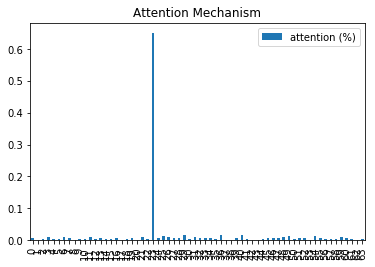

In [15]:
N = 0
ds = pd.DataFrame(k, columns=['attention (%)'])
ds.plot(kind='bar', title='Attention Mechanism')
plt.show()

# RNN and LSTM

In [16]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
TIME_STEP = 10      # rnn time step
INPUT_SIZE = 1      # rnn input size
LR = 0.02          # learning rate

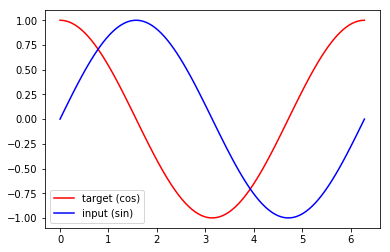

In [18]:
steps = np.linspace(0, np.pi*2, 100, dtype=np.float32)
x_np = np.sin(steps)    # float32 for converting torch FloatTensor
y_np = np.cos(steps)
plt.plot(steps, y_np, 'r-', label='target (cos)')
plt.plot(steps, x_np, 'b-', label='input (sin)')
plt.legend(loc='best')
plt.show()

In [19]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()

        self.rnn = nn.RNN(
            input_size=INPUT_SIZE,
            hidden_size=32,     # rnn hidden unit
            num_layers=1,       # number of rnn layer
            batch_first=True,   # input & output will has batch size as 1s dimension. e.g. (batch, time_step, input_size)
        )
        self.out = nn.Linear(32, 1)

    def forward(self, x, h_state):
        # x (batch, time_step, input_size)
        # h_state (n_layers, batch, hidden_size)
        # r_out (batch, time_step, hidden_size)
        r_out, h_state = self.rnn(x, h_state)

        outs = []    # save all predictions
        for time_step in range(r_out.size(1)):    # calculate output for each time step
            outs.append(self.out(r_out[:, time_step, :]))
        return torch.stack(outs, dim=1), h_state

rnn = RNN()
print(rnn)

RNN(
  (rnn): RNN(1, 32, batch_first=True)
  (out): Linear(in_features=32, out_features=1, bias=True)
)


In [20]:
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)   # optimize all rnn parameters
loss_func = nn.MSELoss()

In [21]:
h_state = None

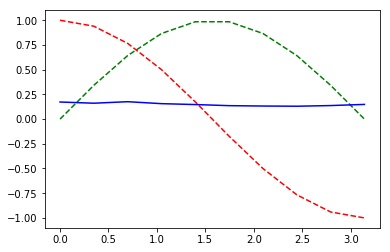

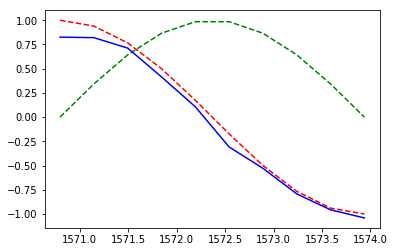

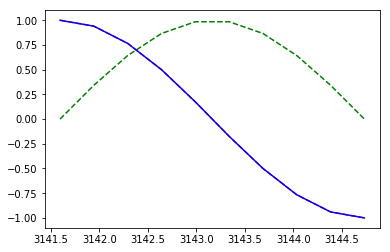

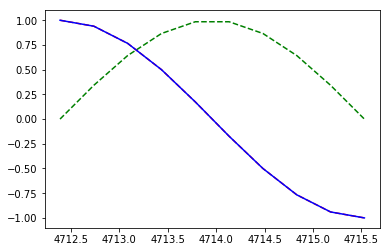

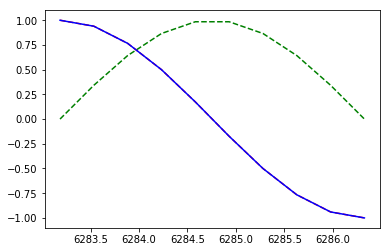

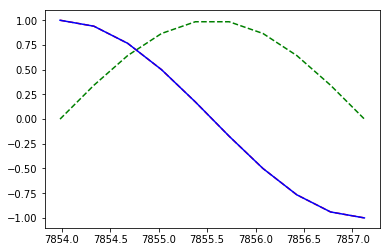

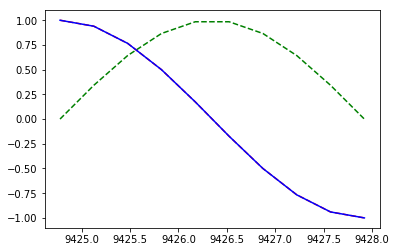

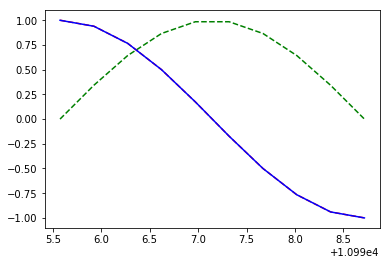

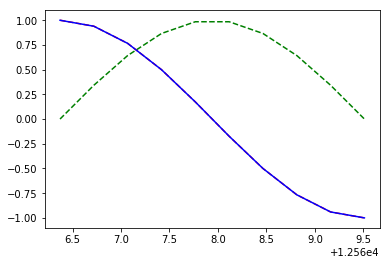

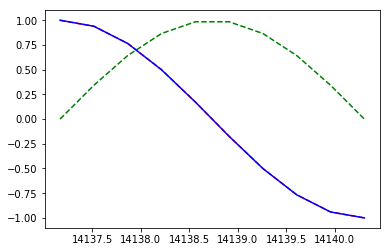

In [22]:
for step in range(5000):
    start, end = step * np.pi, (step+1)*np.pi   # time range
    # use sin predicts cos
    steps = np.linspace(start, end, TIME_STEP, dtype=np.float32)
    x_np = np.sin(steps)    # float32 for converting torch FloatTensor
    y_np = np.cos(steps)

    x = torch.from_numpy(x_np[np.newaxis, :, np.newaxis])    # shape (batch, time_step, input_size)
    y = torch.from_numpy(y_np[np.newaxis, :, np.newaxis])

    prediction, h_state = rnn(x, h_state)   # rnn output
    # !! next step is important !!
    h_state = h_state.data        # repack the hidden state, break the connection from last iteration

    loss = loss_func(prediction, y)         # calculate loss
    optimizer.zero_grad()                   # clear gradients for this training step
    loss.backward()                         # backpropagation, compute gradients
    optimizer.step()                        # apply gradients

    # plotting
    if step % 500 == 0:
        plt.plot(steps, x_np.flatten(), 'g--')
        plt.plot(steps, y_np.flatten(), 'r--')
        plt.plot(steps, prediction.data.numpy().flatten(), 'b-')
        plt.draw()
        plt.show()